In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (10, 10),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params) 

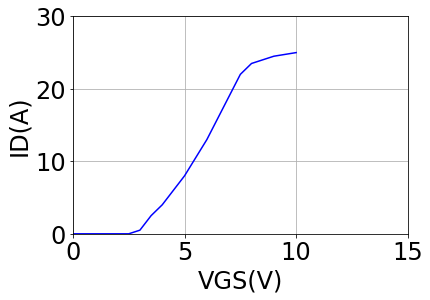

In [3]:
def idi(v):
    i =  0.             if (v < 2.5) else 0
    i = (17.5/2.5)*(v-2.5) if (v >= 2.5  and v <  5.0) else i
    i = (17.5)+(v-5.0) if (v >= 5.0  and v < 7.5) else i
    i = (20) if (v >= 7.5  ) else i
    return i



vgs = np.array([0,1,2, 2.5,   3, 3.5, 4, 5,  6, 7, 7.5,    8,  9,  10]) 
ids = np.array([0,0,0,   0, 0.5, 2.5, 4, 8, 13, 19, 22,   23.5, 24.5, 25]) 


plt.plot(vgs,ids,'b')
plt.axis([0, 15, 0, 30])
plt.grid()
plt.ylabel('ID(A)')
plt.xlabel('VGS(V)')
plt.show()

In [4]:
orden = 6
z = np.polyfit((vgs),ids, orden)
print(np.poly1d(np.polyfit((vgs),ids, orden)))
p = np.poly1d(z)




           6           5          4          3          2
0.0005834 x - 0.01526 x + 0.1287 x - 0.3805 x + 0.6815 x - 0.6885 x + 0.05883


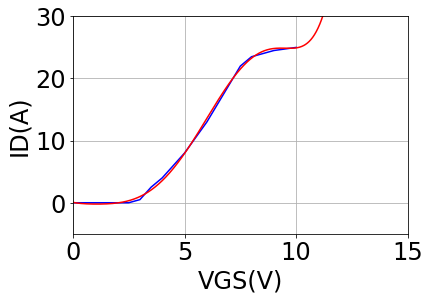

In [5]:
plt.plot(vgs,ids,'b')

vgsa = np.arange(-2.5,12,0.01)
plt.plot(vgsa,p(vgsa),'r')

plt.axis([0, 15, -5, 30])
plt.grid()
plt.ylabel('ID(A)')
plt.xlabel('VGS(V)')
plt.show()

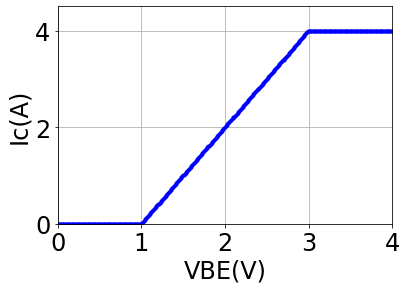

In [28]:
def idtt(v):
    ido = 0
    for o in range(orden+1):
        
        ido += z[o]*v**(orden-o) 
    return ido 


# 5A (v_{gs}-2.5V) - 0.045A (v_{gs}-2.5V)^3
def idia(v):
    i = 0             if (v < 1) else 0
    i = (v-1)*2  if (v >= 1  and v < 3) else i
    i = (4) if (v >= 3  ) else i
    return i


vgsa = np.arange(0,4,0.01)
idsa = []
for v in vgsa:
    idsa.append(idia(v))

plt.plot(vgsa,idsa,'b.')
plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('VBE(V)')
plt.show()